# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [5]:
if os.path.isfile("LC_Bushfire_Water_Quality_Data.csv"):
    filepath = "LC_Bushfire_Water_Quality_Data.csv"
    print("Loading from file")

In [8]:
Bushfire_Water_Data = pd.read_csv("lake_data/LC_Bushfire_Water_Quality_Data.csv")
print("done")

done


In [9]:
Bushfire_Water_Data.head()

,MeasureDateTime,Estuary Name,SiteID,LoggerID,SampleDepth (m),Conductivity (uS/cm),Temp (C),DO (mg/L)
0,20/01/2020 12:30,Lake Conjola,CON1,CON1-Surface,0.5,35444.2,24.95,7.23
1,20/01/2020 12:45,Lake Conjola,CON1,CON1-Surface,0.5,34664.3,25.01,7.64
2,20/01/2020 13:00,Lake Conjola,CON1,CON1-Surface,0.5,34318.8,25.03,7.66
3,20/01/2020 13:15,Lake Conjola,CON1,CON1-Surface,0.5,34164.1,25.06,7.66
4,20/01/2020 13:30,Lake Conjola,CON1,CON1-Surface,0.5,34044.5,25.04,7.67


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

We can also get the list of columns out of the data frame

In [7]:
Bushfire_Water_Data.columns

Index(['MeasureDateTime', 'Estuary Name', 'SiteID', 'LoggerID',
       'SampleDepth (m)', 'Conductivity (uS/cm)', 'Temp (�C)', 'DO (mg/L)',
       'BushfireDateTime'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the iloc property.

This gives us the row as a _Series_.

↓

In [8]:
row_one = Bushfire_Water_Data.iloc[1]
row_one

MeasureDateTime         20/01/2020 12:45
Estuary Name                Lake Conjola
SiteID                              CON1
LoggerID                    CON1-Surface
SampleDepth (m)                      0.5
Conductivity (uS/cm)             34664.3
Temp (�C)                          25.01
DO (mg/L)                           7.64
BushfireDateTime                     NaN
Name: 1, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [9]:
row_one["MeasureDateTime"]

'20/01/2020 12:45'

In [10]:
row_one.MeasureDateTime

'20/01/2020 12:45'

Doing the same thing on a dataframe gives us the whole column

In [11]:
Bushfire_Water_Data["Conductivity (uS/cm)"]

0       35444.2
1       34664.3
2       34318.8
3       34164.1
4       34044.5
         ...   
2682      529.2
2683      528.3
2684      527.9
2685      526.9
2686      526.0
Name: Conductivity (uS/cm), Length: 2687, dtype: float64

<AxesSubplot:>

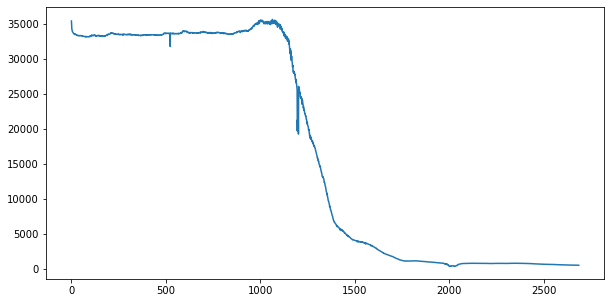

In [12]:
Bushfire_Water_Data["Conductivity (uS/cm)"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<AxesSubplot:>

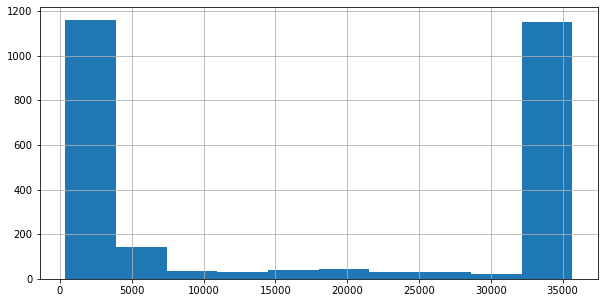

In [13]:
Bushfire_Water_Data["Conductivity (uS/cm)"].hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.